## Fitting Ne lines in a loop
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- The easiest way to install diad fit is by removing the #, and running this once per computer. When I update the code, you'll need to get the new tag off GitHub:
https://github.com/PennyWieser/DiadFit/tags
Right click on the top one, over the 'zip' icon, click copy link address
- Remove the # in the line below. Run only once for each computer!
![image.png](attachment:5a0e0d97-4380-4cb2-bf26-d0ab6ee7458a.png)

In [30]:
#!pip install --upgrade "https://github.com/PennyWieser/DiadFit/archive/refs/tags/v.0.23.zip"

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.23'

## Extracting metadata

In [32]:
 # Path to metadata files for Ne. Easier to have in subfolder
meta_path=r'/Users/kyledayton/Downloads/09.30.22 LM6 G3 MI4 AND G22 MI3-selected/09.30.22 Text Files'
spectra_path=r'/Users/kyledayton/Downloads/09.30.22 LM6 G3 MI4 AND G22 MI3-selected/09.30.22 Spectra/09.30.22 Ne Spectra'

# Find files


# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext_meta='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
 # Leave as none unless witec appended a number
Ne_files_meta=pf.get_Ne_files(path=meta_path, file_ext=file_ext_meta, ID_str=ID_str, 
                         exclude_str=exclude_str, sort=True)

Ne_files_meta


['LM6 G22 MI3 LINE SCAN PHOTO.txt',
 'LM6 G22 MI3 LINE SCAN.txt',
 'LM6 G3 MI4 LINE SCAN PHOTO.txt',
 'LM6 G3 MI4 LINE SCAN.txt',
 'NE 1.txt',
 'NE 2.txt',
 'NE 3.txt',
 'NE 4.txt',
 'NE 5.txt',
 'NE 6.txt',
 'NE 7.txt']

In [33]:
## Image file says Video Image

In [34]:
# Extract useful metadata from each file
meta=pf.stitch_metadata_in_loop(path=meta_path, Allfiles=Ne_files_meta, prefix=False, trupower=True)
meta.head()

100%|█████████████████████████████████████████| 11/11 [00:00<00:00, 1222.60it/s]

Done



/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/DiadFit/importing_data_files.py:594: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Time_Df_2['index']=Time_Df_2.index


,filename,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index
4,NE 1.txt,"September 30, 2022\n",5.029,45.0,3.0,100.0,"['0h', '2m', '18s']",1:16:03 PM\n,47763.0,1325.0,4
5,NE 2.txt,"September 30, 2022\n",5.029,45.0,3.0,100.0,"['0h', '2m', '17s']",1:31:06 PM\n,48666.0,1325.0,5
6,NE 3.txt,"September 30, 2022\n",5.031,45.0,3.0,100.0,"['0h', '2m', '17s']",1:39:13 PM\n,49153.0,1325.0,6
7,NE 4.txt,"September 30, 2022\n",5.031,45.0,3.0,100.0,"['0h', '2m', '17s']",1:47:35 PM\n,49655.0,1325.0,7
8,NE 5.txt,"September 30, 2022\n",5.029,45.0,3.0,100.0,"['0h', '2m', '17s']",2:00:23 PM\n,50423.0,1325.0,8


## Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [35]:
wavelength =532.067 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, cut_off_intensity=2000)
df_Ne.head()

,Raman_shift (cm-1),Intensity,Ne emission line in air
1,817.957694,5000.0,556.27662
9,1116.345158,5000.0,565.66588
16,1309.738376,5000.0,571.92248
19,1398.173304,5000.0,574.82985
23,1446.822793,7000.0,576.44188


## Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for the line shift you have written down

In [36]:
line_1=1117
line_2=1447
ideal_split=pf.calculate_Ne_splitting(wavelength=wavelength, 
                                      line1_shift=line_1, line2_shift=line_2,
                                     cut_off_intensity=2000)
ideal_split

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,330.477634,1116.345158,1446.822793,1117,1447


## Find your Ne spectra files

In [37]:
filetype='headless_txt'
# Put the common string you can in all your Ne lines here
ID_str='NE '
file_ext='txt' # Will only take files of this type 
exclude_str='png' # Will exclude files of this type, sometimes images have same name
prefix=True # Leave as none unless witec appended a number
Ne_files=pf.get_Ne_files(path=spectra_path, file_ext=file_ext, ID_str=ID_str, exclude_str=exclude_str, sort=True)

In [38]:
Ne_files

['NE 2.txt', 'NE 3.txt', 'NE 4.txt', 'NE 5.txt', 'NE 6.txt']

## Select the first file you want to fit
- You can either do this numerically, or by specifiying the filename between ''

In [39]:
filename=Ne_files[0]  # Or you could put a string here, like 'NE1.txt' 

## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook

Biggest 6 peaks:


,pos,height
45,1447.878781,24134.000000
40,1399.406110,6133.000000
54,1567.003346,3971.333252
7,1118.069988,2197.000000
20,1220.505213,1983.000000
28,1310.739623,1591.000000


selected Peak 1 Pos
1118.069988
selected Peak 2 Pos
1447.878781


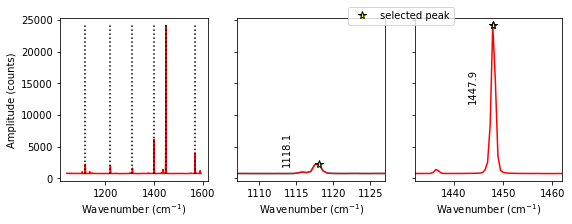

In [40]:
# Specify the approximate peak positions of the lines you are interested in
# If your drift is off the real positions, you'll have to tweak these numbers
peak1_cent=line_1 # approximate position of the 1st line you are interested in
peak2_cent=line_2 # Approximate position of the 2nd line you are interested in


Ne, df_sort_Ne_trim, nearest_pk1, nearest_pk2=pf.plot_Ne_lines(path=spectra_path, filename=filename, filetype=filetype, 
n_peaks=6, peak1_cent=peak1_cent, peak2_cent=peak2_cent,
height=10, threshold=0.6, distance=1, prominence=10, width=1, exclude_range_1=None,
exclude_range_2=None)

## You can tweak parameters here
- The default parameters may work, you can see what those are here:
- Most important things, the number of peaks you want for 1117, and the offset for this peak (LH_offset_min) if you are fitting the 1117 line as you need 2 peaks
- By default, the function applies the fit to all the points inside the outermost background positions. This can be trimmed using x_span_pk1_override, and x_span_pk2_override
- See figure from Penny for what these parameters actually are

In [41]:
pf.Ne_peak_config()

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=1, lower_bck_pk1=(-50, -25), upper_bck1_pk1=(8, 15), upper_bck2_pk1=(30, 50), lower_bck_pk2=(-44.2, -22), upper_bck1_pk2=(15, 50), upper_bck2_pk2=(50, 51), x_range_baseline=20, y_range_baseline=200, pk1_amplitude=100, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=(1.5, 3), x_span_pk1=None, x_span_pk2=None)

- You can also overwrite any of these, the most likely things you'll want to overwrite are the background positions, or the amplitude

In [42]:
Ne_Config=pf.Ne_peak_config(pk1_amplitude=40, pk2_amplitude=100, LH_offset_mini=[2, 5], 
lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10], N_poly_pk2_baseline=2 )
Ne_Config

Ne_peak_config(N_poly_pk1_baseline=1, N_poly_pk2_baseline=2, lower_bck_pk1=(-60, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70], lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40], x_range_baseline=20, y_range_baseline=200, pk1_amplitude=40, pk2_amplitude=100, x_range_peak=15, x_range_residual=7, LH_offset_mini=[2, 5], x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])

,filename,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,error_pk1,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,2.txt,1448.003089,30318.061503,0.254278,0.254278,0.00523,1117.799482,2340.597846,0.263743,0.263743,NaN,330.203607,1.00083,NaN,NaN,148.432886,16.68578,165.118666


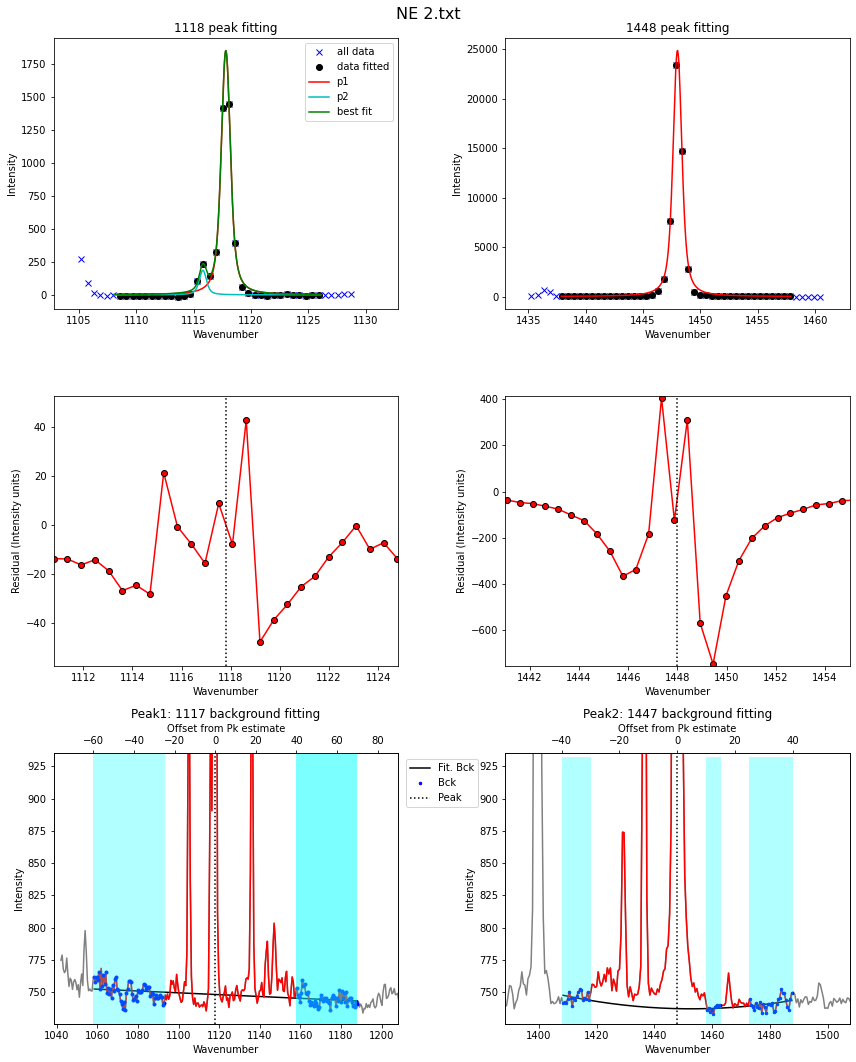

In [43]:
# You also need to set whether you want 1 peak or 2 for the LH diad
peaks_1=2

df_test=pf.fit_Ne_lines(  
    config=Ne_Config, peaks_1=peaks_1,
    Ne=Ne, filename=filename, path=spectra_path, prefix=prefix,
    Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
    DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
display(df_test)

## Now you can loop over all files using these parameters
- Most important thing you can change is plot_figure=False, much quicker, but wont save or show figures, plot_figure=True will)
- If you need, you can add other parameters in the loop here. 

In [44]:
len(Ne_files)

5

100%|█████████████████████████████████████████████| 5/5 [00:03<00:00,  1.36it/s]


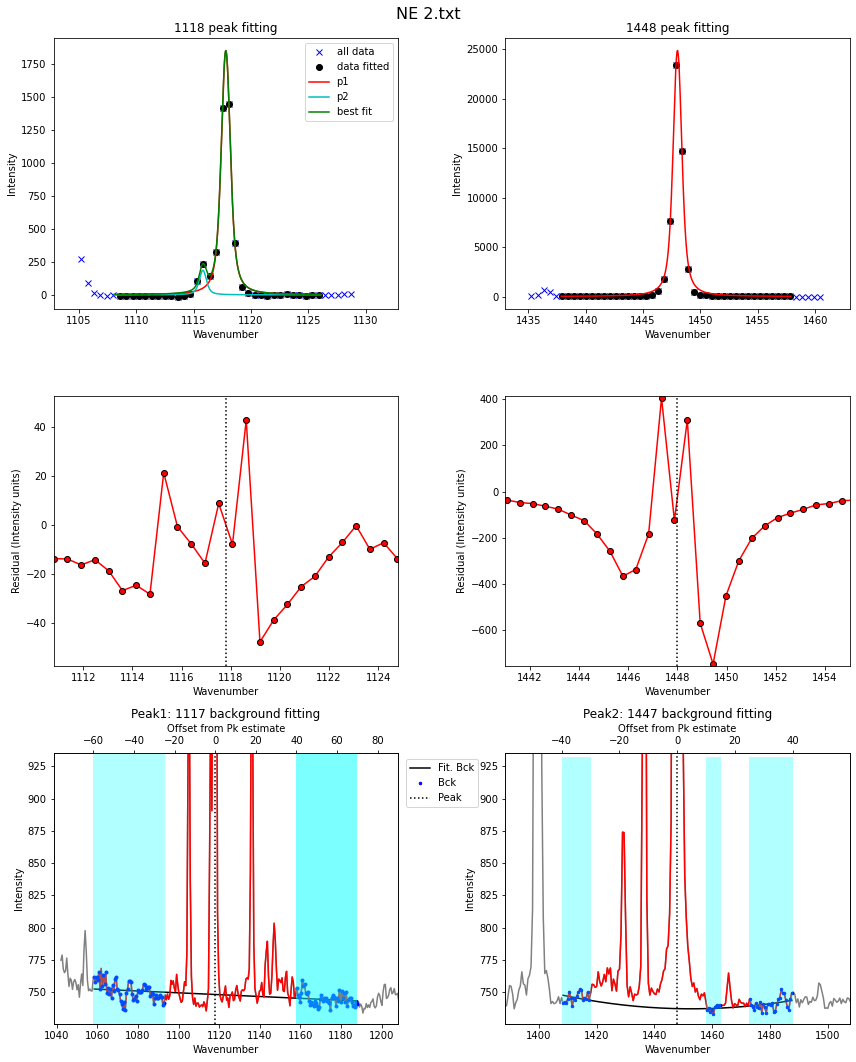

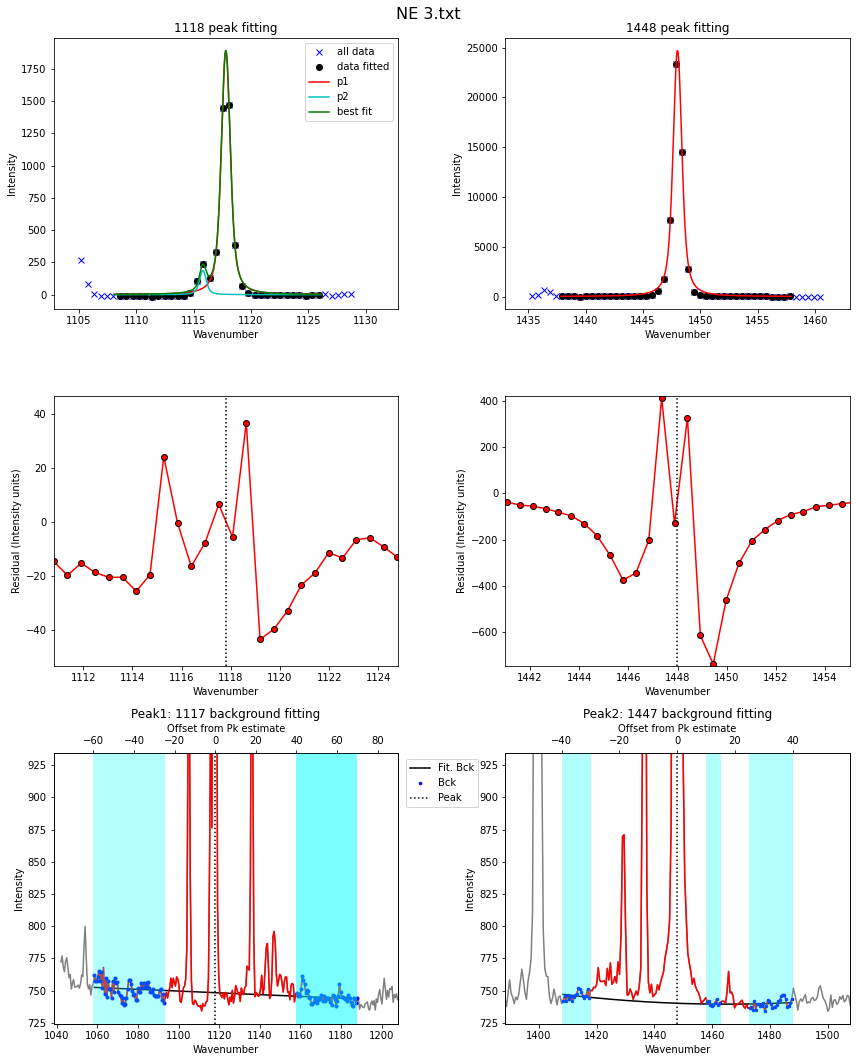

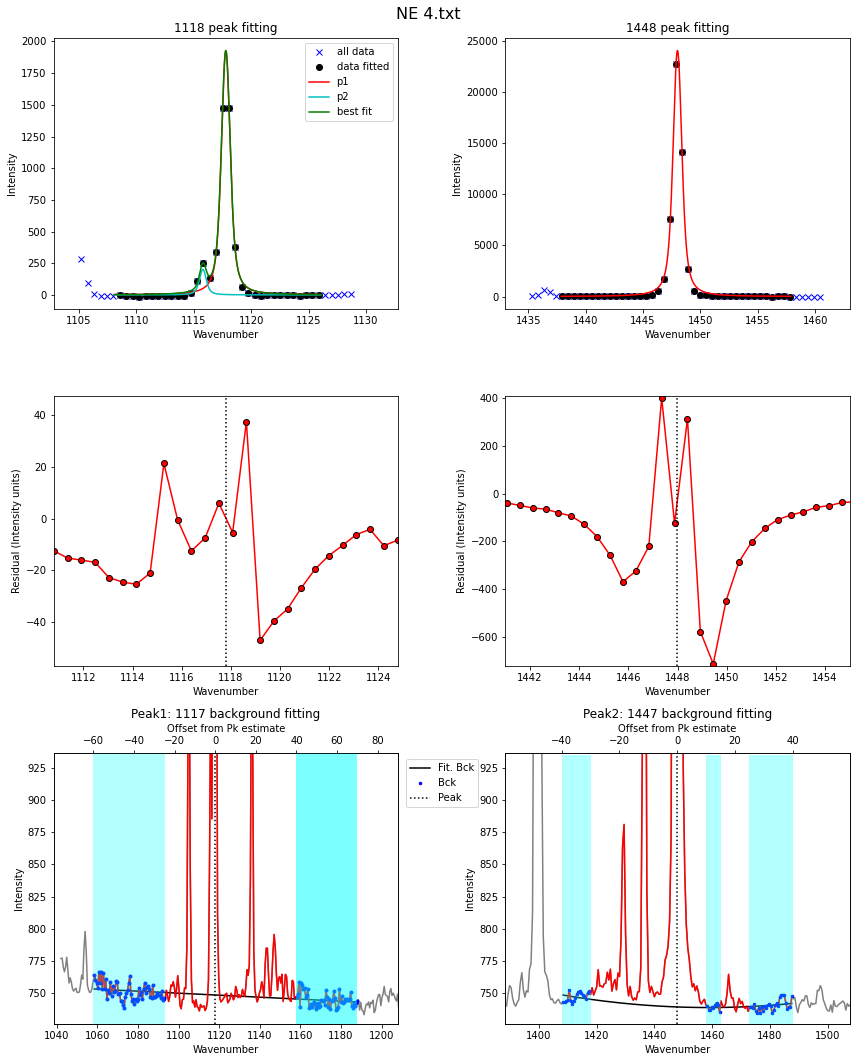

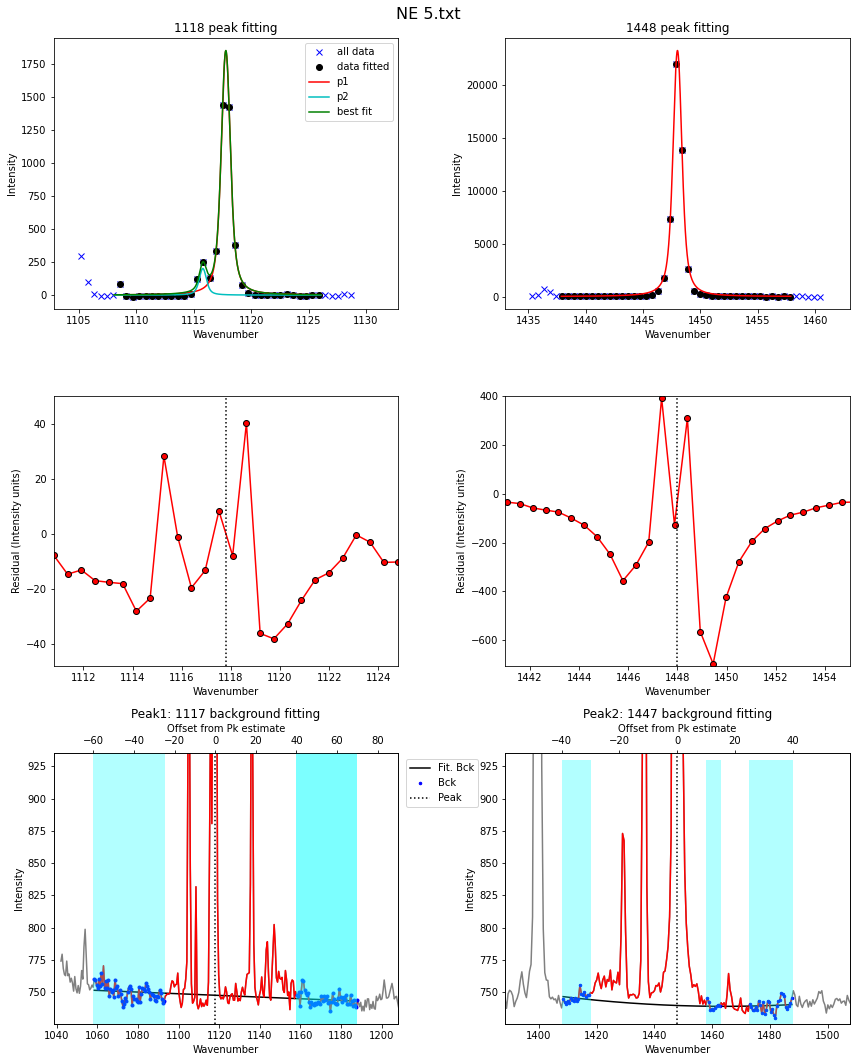

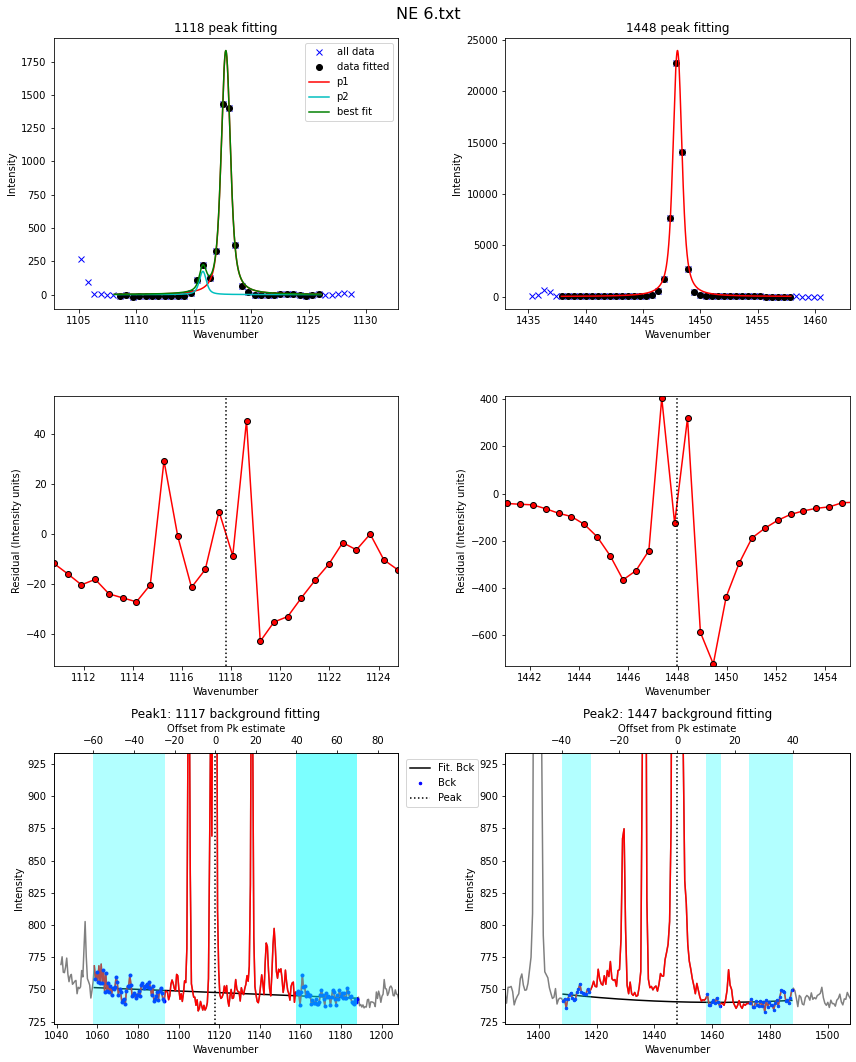

In [45]:
df2=pf.loop_Ne_lines(files=Ne_files, path=spectra_path, filetype=filetype,
                  config=Ne_Config, peaks_1=2, Ne=Ne, Ne_center_1=nearest_pk1,
                  Ne_center_2=nearest_pk2, DeltaNe_ideal=ideal_split['Ne_Split'], 
                  plot_figure=True, save_clipboard=True, single_acq=False)

# If any are weird, can fit again here
- If you refit, you'll have to replace the value in the saved dataframe

In [46]:
# # Which file
# filename2=Ne_files[1]  # Or you could put a string here, like 'NE1.txt' 

# # Tweak fit

# Ne_Config2=pf.Ne_peak_config(amplitude=100, LH_offset_mini=[2, 5], 
# lower_bck_pk1=(-50, -30), upper_bck1_pk1=[7, 13], upper_bck2_pk1=[50, 80],
# lower_bck_pk2=[-40, -30], upper_bck1_pk2=[15, 50], upper_bck2_pk2=[50, 80],
# x_range_peak=15, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10])
# Ne_Config

# # You also need to set whether you want 1 peak or 2 for the LH diad
# peaks_1=2

# df_test=pf.fit_Ne_lines(  
#     config=Ne_Config2, peaks_1=peaks_1,
#     Ne=Ne, filename=filename2, path=spectra_path, prefix=prefix,
#     Ne_center_1=nearest_pk1, Ne_center_2=nearest_pk2,
#     DeltaNe_ideal=ideal_split['Ne_Split'])                                                                 
                                                                     
        
# #config: Ne_peak_config=Ne_peak_config(),

## Stitching meta data with Ne line data

In [47]:
# See what deliminators you have in your metadata file you have just got
print(meta['filename'][10])

NE 7.txt


In [48]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_type='.txt')

file_m

array(['NE 1', 'NE 2', 'NE 3', 'NE 4', 'NE 5', 'NE 6', 'NE 7',
       'LM6 G3 MI4 LINE SCAN', 'LM6 G22 MI3 LINE SCAN'], dtype=object)

In [49]:
type(file_m)

numpy.ndarray

In [50]:
# See what file names you have for your actual datafiles
print(df2['filename'][0])

NE 2.txt


In [51]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=False, str_prefix='',
   file_type='.txt')
file_s

array(['NE 2', 'NE 3', 'NE 4', 'NE 5', 'NE 6'], dtype=object)

## Now combining them

In [52]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect what our Ne correction factors actually look like

In [53]:
help(pf.plot_Ne_corrections)

Help on function plot_Ne_corrections in module DiadFit.ne_lines:

plot_Ne_corrections(df=None, x_axis=None, x_label='index', marker='o', mec='k', mfc='r')
    ## Plot to help inspect which Ne lines to discard



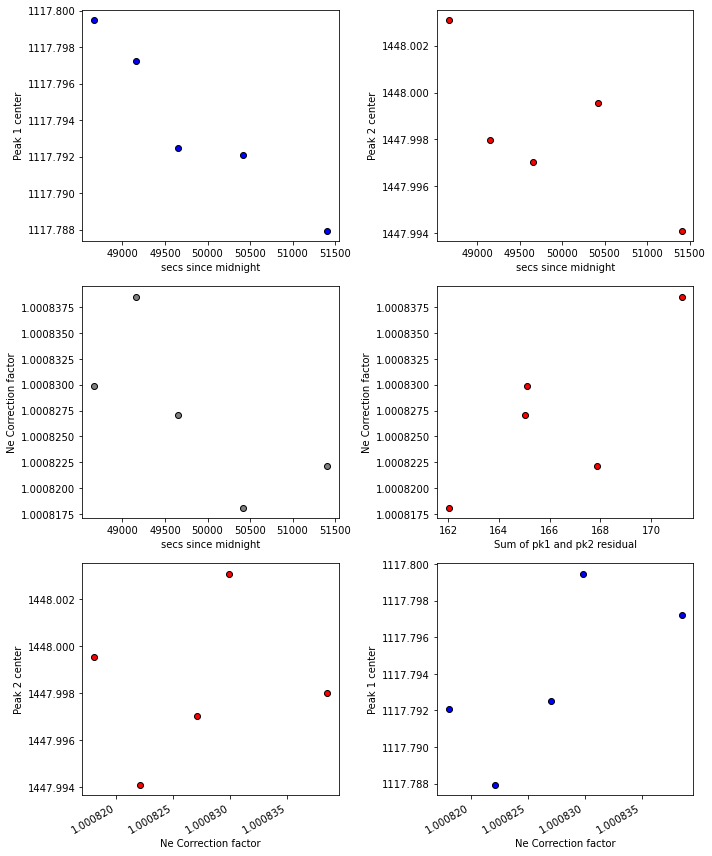

In [54]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')

/Users/kyledayton/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


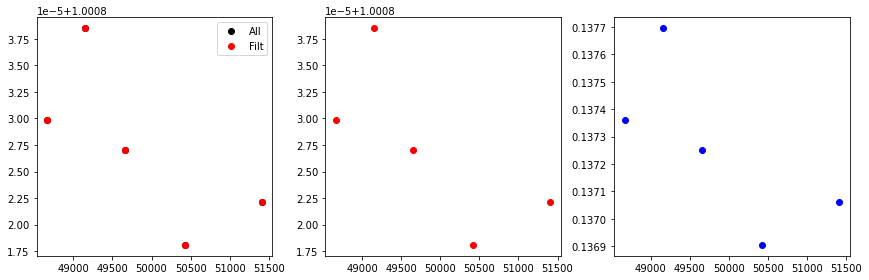

In [55]:
filt=pf.filter_Ne_Line_neighbours(Corr_factor=df_combo['Ne_Corr'], number_av=5, offset=0.0001)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='All')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')
ax1.legend()
ax2.plot(df_combo['sec since midnight'], filt,  'or', label='Filt')

test_split=103
split=filt*test_split
density_test=pf.calculate_density_cornell(temp='SupCrit', Split=split)
ax3.plot(df_combo['sec since midnight'].loc[density_test['Preferred D']>0],
         density_test['Preferred D'].loc[density_test['Preferred D']>0], 'ob')
fig.tight_layout()

In [56]:
df_combo.to_excel('Ne Lines 09.30.22.xlsx')

In [57]:
df_combo

,filename_x,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,pk1_peak_cent,pk1_amplitude,pk1_sigma,pk1_gamma,...,date,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,index
0,NE 2.txt,1448.003089,30318.061503,0.254278,0.254278,0.00523,1117.799482,2340.597846,0.263743,0.263743,...,"September 30, 2022\n",5.029,45.0,3.0,100.0,"['0h', '2m', '17s']",1:31:06 PM\n,48666.0,1325.0,5
1,NE 3.txt,1447.997991,30195.869237,0.255079,0.255079,0.00545,1117.797230,2360.817912,0.260828,0.260828,...,"September 30, 2022\n",5.031,45.0,3.0,100.0,"['0h', '2m', '17s']",1:39:13 PM\n,49153.0,1325.0,6
2,NE 4.txt,1447.997026,29493.061222,0.255487,0.255487,0.00538,1117.792492,2383.377995,0.258332,0.258332,...,"September 30, 2022\n",5.031,45.0,3.0,100.0,"['0h', '2m', '17s']",1:47:35 PM\n,49655.0,1325.0,7
3,NE 5.txt,1447.999564,28595.165601,0.256998,0.256998,0.00538,1117.792070,2335.065156,0.263782,0.263782,...,"September 30, 2022\n",5.029,45.0,3.0,100.0,"['0h', '2m', '17s']",2:00:23 PM\n,50423.0,1325.0,8
4,NE 6.txt,1447.994104,29434.885313,0.256012,0.256012,0.00547,1117.787940,2302.036939,0.262368,0.262368,...,"September 30, 2022\n",5.031,45.0,3.0,100.0,"['0h', '2m', '17s']",2:16:47 PM\n,51407.0,1325.0,9


## Now lets make a regression against time

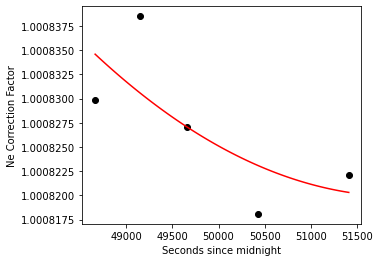

In [58]:
df_combo_filt=df_combo[density_test['Preferred D']>0]
model=pf.reg_Ne_lines_time(df=df_combo_filt, N_poly=2, fit='poly')

## SAving as pickle, can then load as a pickle

In [59]:
import pickle
with open('Ne_Line_Regression_09.30.22.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)

In [60]:
with open('Ne_Line_Regression_09.30.22.pck', 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

## You can then load these pickles into the notebook where you fit your Diad data|